In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('../data/Iris Dataset.csv')

In [8]:
def remove_species_column(dataset):
    species = dataset['Species'].values
    dataset = dataset.drop('Species', axis=1)
    return dataset, species

In [9]:
def principal_component_analysis(dataset):
    cov_matrix = np.cov(dataset.T)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    eigenvectors = eigenvectors[:, :3]
    transformed_data = dataset @ eigenvectors
    return transformed_data, eigenvalues, eigenvectors

In [10]:
def k_means_clustering(dataset):
    k = 3
    max_iterations = 100  
    np.random.seed(0)
    centroids = dataset[np.random.choice(len(dataset), k, replace=False)]
    for _ in range(max_iterations):
        distances = np.linalg.norm(dataset[:, np.newaxis] - centroids, axis=-1)
        cluster_labels = np.argmin(distances, axis=1)

        for i in range(k):
            centroids[i] = np.mean(dataset[cluster_labels == i], axis=0)

    return cluster_labels, centroids

In [16]:
def plot_clusters(dataset, cluster_labels, species):
    plt.figure(figsize=(8, 6))
    colors = ['red', 'green', 'blue']

    for i in range(len(dataset)):
        plt.scatter(dataset[i, 0], dataset[i, 1], color=colors[cluster_labels[i]], alpha=0.5)

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('K-Means Clustering')

    unique_labels = np.unique(cluster_labels)
    for label in unique_labels:
        cluster_points = dataset[cluster_labels == label]
        center = np.mean(cluster_points, axis=0)
        radius = np.max(np.linalg.norm(cluster_points - center, axis=1))
        circle = plt.Circle(center, radius, color='black', fill=False)
        plt.gca().add_artist(circle)
    plt.show()

    plt.figure(figsize=(8, 6))
    species_labels = np.unique(species)

    for label in species_labels:
        indices = np.where(species == label)
        plt.scatter(dataset[indices, 0], dataset[indices, 1], label=label)

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Actual Species')
    plt.legend()
    plt.show()


In [17]:
dataset, species = remove_species_column(data)

transformed_data, eigenvalues, eigenvectors = principal_component_analysis(dataset)

transformed_data = transformed_data.values

cluster_labels, centroids = k_means_clustering(transformed_data)

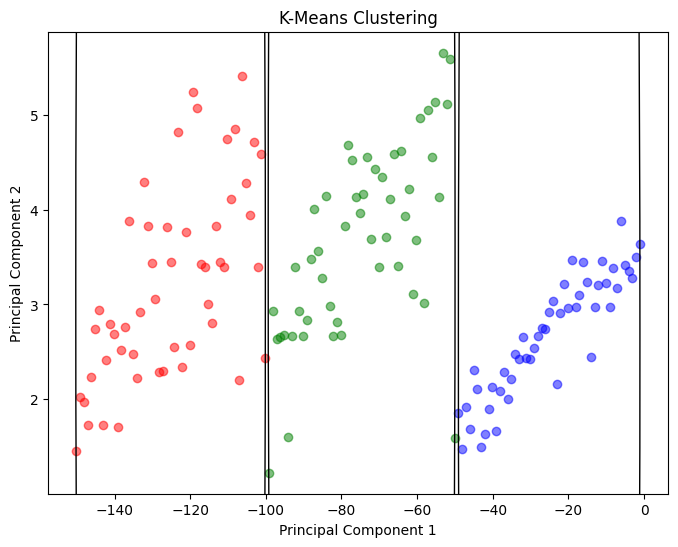

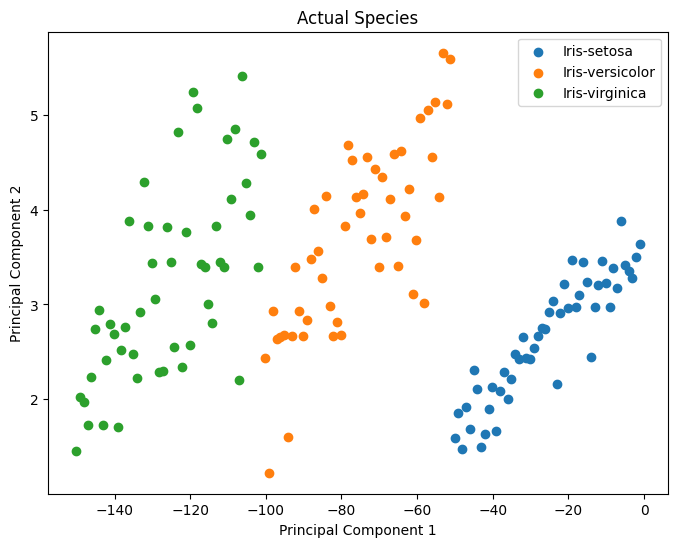

In [18]:
plot_clusters(transformed_data, cluster_labels, species)